In [59]:
import numpy as np

# Load embeddings for the Cross-Entropy model
data_cross_entropy = np.load('cross_entropy_embeddings.npz')
intent_means_cross_entropy = data_cross_entropy['intent_means']
oos_test_embeddings_cross_entropy = data_cross_entropy['oos_test_embeddings']
intent_labels_cross_entropy = data_cross_entropy['intent_labels']

# Load embeddings for the Autoencoder model
data_autoencoder = np.load('autoencoder_embeddings.npz')
intent_means_autoencoder = data_autoencoder['intent_means']
oos_test_embeddings_autoencoder = data_autoencoder['oos_test_embeddings']
intent_labels_autoencoder = data_autoencoder['intent_labels']

# Randomly sample the same OOS point
sample_indices_oos = np.random.choice(len(oos_test_embeddings_cross_entropy), size=20, replace=False)

oos_test_embeddings_cross_entropy_sampled = oos_test_embeddings_cross_entropy[sample_indices_oos]
oos_test_embeddings_autoencoder_sampled = oos_test_embeddings_autoencoder[sample_indices_oos]

# Randomly sample five intent embeddings
sample_indices_intent = np.random.choice(len(intent_means_cross_entropy), size=5, replace=False)

intent_means_cross_entropy_sampled = intent_means_cross_entropy[sample_indices_intent]
intent_means_autoencoder_sampled = intent_means_autoencoder[sample_indices_intent]
intent_labels_cross_entropy_sampled = intent_labels_cross_entropy[sample_indices_intent]
intent_labels_autoencoder_sampled = intent_labels_autoencoder[sample_indices_intent]

In [60]:
len(intent_means_cross_entropy)

78

In [61]:
from sklearn.manifold import TSNE

# Combine embeddings
all_embeddings = np.vstack([
    intent_means_cross_entropy_sampled, 
    oos_test_embeddings_cross_entropy_sampled, 
    intent_means_autoencoder_sampled, 
    oos_test_embeddings_autoencoder_sampled
])

# Apply t-SNE on the combined embeddings
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(all_embeddings)



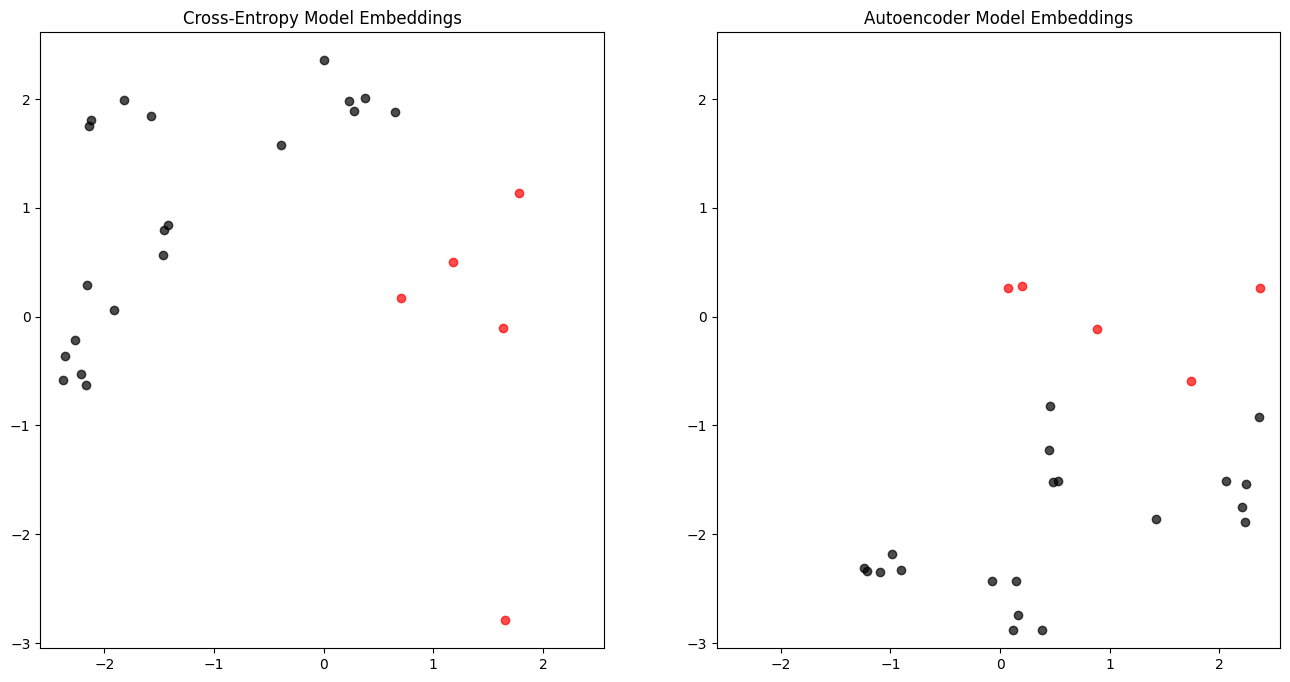

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the indices for separating the embeddings
n_intent_means_cross_entropy_sampled = len(intent_means_cross_entropy_sampled)
n_oos_test_embeddings_cross_entropy_sampled = len(oos_test_embeddings_cross_entropy_sampled)
n_intent_means_autoencoder_sampled = len(intent_means_autoencoder_sampled)
n_oos_test_embeddings_autoencoder_sampled = len(oos_test_embeddings_autoencoder_sampled)

# Generate a color palette with higher contrast
palette = sns.color_palette("tab20", n_intent_means_cross_entropy_sampled + n_intent_means_autoencoder_sampled)

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot embeddings for the Cross-Entropy model
for i, label in enumerate(intent_labels_cross_entropy_sampled):
    axes[0].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=f'Intent {label}', color="red", alpha=0.7)
axes[0].scatter(reduced_embeddings[n_intent_means_cross_entropy_sampled:n_intent_means_cross_entropy_sampled+n_oos_test_embeddings_cross_entropy_sampled, 0], 
                reduced_embeddings[n_intent_means_cross_entropy_sampled:n_intent_means_cross_entropy_sampled+n_oos_test_embeddings_cross_entropy_sampled, 1], 
                c='black', label='OOS Cross-Entropy', alpha=0.7)
axes[0].set_title('Cross-Entropy Model Embeddings')

# Plot embeddings for the Autoencoder model
for i, label in enumerate(intent_labels_autoencoder_sampled):
    axes[1].scatter(reduced_embeddings[n_intent_means_cross_entropy_sampled+n_oos_test_embeddings_cross_entropy_sampled+i, 0], 
                    reduced_embeddings[n_intent_means_cross_entropy_sampled+n_oos_test_embeddings_cross_entropy_sampled+i, 1], 
                    label=f'Intent {label}', color="red", alpha=0.7)
axes[1].scatter(reduced_embeddings[n_intent_means_cross_entropy_sampled+n_oos_test_embeddings_cross_entropy_sampled+n_intent_means_autoencoder_sampled:, 0], 
                reduced_embeddings[n_intent_means_cross_entropy_sampled+n_oos_test_embeddings_cross_entropy_sampled+n_intent_means_autoencoder_sampled:, 1], 
                c='black', label='OOS Autoencoder', alpha=0.7)
axes[1].set_title('Autoencoder Model Embeddings')

# Get the limits of the plots
x_min = min(axes[0].get_xlim()[0], axes[1].get_xlim()[0])
x_max = max(axes[0].get_xlim()[1], axes[1].get_xlim()[1])
y_min = min(axes[0].get_ylim()[0], axes[1].get_ylim()[0])
y_max = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])

# Set the same limits for both plots
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

plt.show()


In [63]:
intent_labels_cross_entropy

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [49]:
import numpy as np

# Load embeddings for the Cross-Entropy model
data_cross_entropy = np.load('cross_entropy_embeddings.npz')
intent_means_cross_entropy = data_cross_entropy['intent_means']
oos_test_embeddings_cross_entropy = data_cross_entropy['oos_test_embeddings']
intent_labels_cross_entropy = data_cross_entropy['intent_labels']

# Load embeddings for the Autoencoder model
data_autoencoder = np.load('autoencoder_embeddings.npz')
intent_means_autoencoder = data_autoencoder['intent_means']
oos_test_embeddings_autoencoder = data_autoencoder['oos_test_embeddings']
intent_labels_autoencoder = data_autoencoder['intent_labels']

# Randomly sample the same OOS points
np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(len(oos_test_embeddings_cross_entropy), size=min(len(oos_test_embeddings_cross_entropy), len(oos_test_embeddings_autoencoder)), replace=False)

oos_test_embeddings_cross_entropy_sampled = oos_test_embeddings_cross_entropy[sample_indices]
oos_test_embeddings_autoencoder_sampled = oos_test_embeddings_autoencoder[sample_indices]


In [25]:
# Create labels for IS and OOS samples
labels_cross_entropy = np.concatenate([np.zeros(len(intent_means_cross_entropy)), np.ones(len(oos_test_embeddings_cross_entropy_sampled))])
labels_autoencoder = np.concatenate([np.zeros(len(intent_means_autoencoder)), np.ones(len(oos_test_embeddings_autoencoder_sampled))])


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Combine embeddings and labels
combined_embeddings_cross_entropy = np.vstack([intent_means_cross_entropy, oos_test_embeddings_cross_entropy_sampled])
combined_labels_cross_entropy = labels_cross_entropy

combined_embeddings_autoencoder = np.vstack([intent_means_autoencoder, oos_test_embeddings_autoencoder_sampled])
combined_labels_autoencoder = labels_autoencoder

# Apply LDA
lda = LDA(n_components=1)
reduced_embeddings_cross_entropy = lda.fit_transform(combined_embeddings_cross_entropy, combined_labels_cross_entropy)
reduced_embeddings_autoencoder = lda.fit_transform(combined_embeddings_autoencoder, combined_labels_autoencoder)


In [27]:
from sklearn.manifold import TSNE

# Apply t-SNE on the LDA-transformed embeddings
tsne = TSNE(n_components=1, random_state=42)
tsne_embeddings_cross_entropy = tsne.fit_transform(reduced_embeddings_cross_entropy)
tsne_embeddings_autoencoder = tsne.fit_transform(reduced_embeddings_autoencoder)


In [28]:
import numpy as np

# Create 2D projections for visualization
tsne_embeddings_cross_entropy_2d = np.hstack((tsne_embeddings_cross_entropy, np.zeros_like(tsne_embeddings_cross_entropy)))
tsne_embeddings_autoencoder_2d = np.hstack((tsne_embeddings_autoencoder, np.zeros_like(tsne_embeddings_autoencoder)))


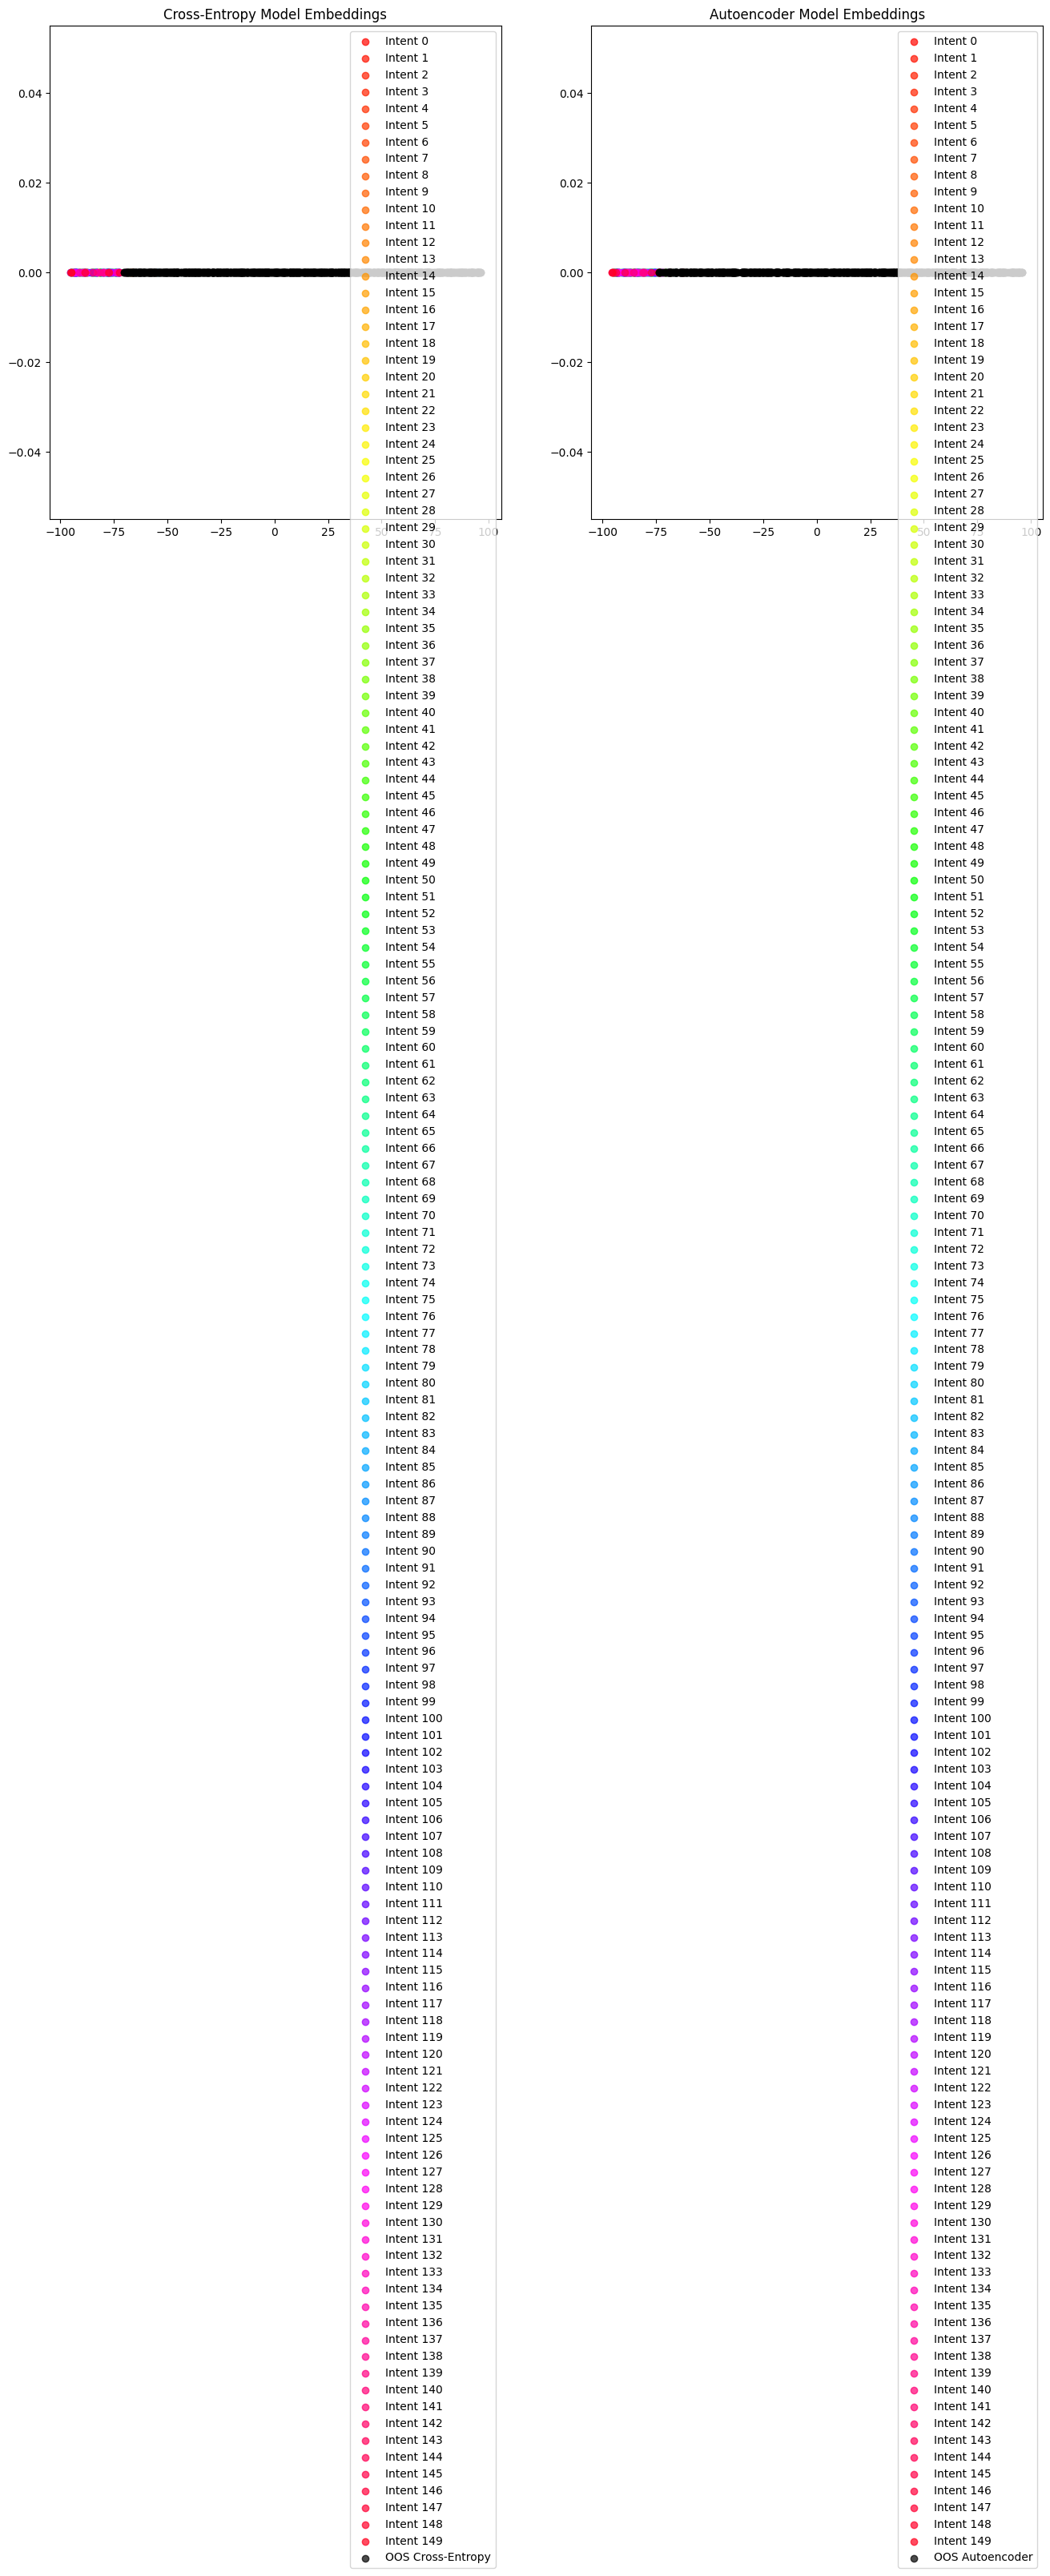

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a color palette
palette = sns.color_palette("hsv", len(intent_labels_cross_entropy))

# Plot embeddings for the Cross-Entropy model
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
for i, label in enumerate(intent_labels_cross_entropy):
    plt.scatter(tsne_embeddings_cross_entropy_2d[i, 0], tsne_embeddings_cross_entropy_2d[i, 1], label=f'Intent {label}', color=palette[i], alpha=0.7)
plt.scatter(tsne_embeddings_cross_entropy_2d[len(intent_labels_cross_entropy):, 0], 
            tsne_embeddings_cross_entropy_2d[len(intent_labels_cross_entropy):, 1], 
            c='black', label='OOS Cross-Entropy', alpha=0.7)
plt.legend()
plt.title('Cross-Entropy Model Embeddings')

# Plot embeddings for the Autoencoder model
plt.subplot(1, 2, 2)
for i, label in enumerate(intent_labels_autoencoder):
    plt.scatter(tsne_embeddings_autoencoder_2d[i, 0], tsne_embeddings_autoencoder_2d[i, 1], label=f'Intent {label}', color=palette[i], alpha=0.7)
plt.scatter(tsne_embeddings_autoencoder_2d[len(intent_labels_autoencoder):, 0], 
            tsne_embeddings_autoencoder_2d[len(intent_labels_autoencoder):, 1], 
            c='black', label='OOS Autoencoder', alpha=0.7)
plt.legend()
plt.title('Autoencoder Model Embeddings')

plt.show()
